In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [2]:
lin=fb[fb.page_name=="林德福"]
lin.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19135,888230767933636_2145125488910818,888230767933636,林德福,政治人物,【永和帳務中心】\r\n\r\n新北市政府今（16日）舉辦「享．再一起生活節」青年社群交流成果展，市長侯友宜、立委林德福、市議員連斐璠等出席與青年社群交流，市長侯友宜特別出席開幕活動，他強調，國軍廢棄的帳務中心活化有成，未來將朝公共托育、托老等公益空間規畫。\r\n\r\n（內容摘自中國時報新聞）\r\n\r\n#永和,NaN,link,https://www.facebook.com/888230767933636/posts/2145125488910818/,2019-03-16T10:24:13+0000,2019-03-16T18:24:13,...,永和帳務中心活化有成 未來擬轉型公托、托老,新北市政府今（16日）舉辦「享．再一起生活節」青年社群交流成果展，市長侯友宜、立委林德福、市議員連斐璠等出席與青年社群交流，市長侯友宜特別出席開幕活動，他強調，國軍廢棄的帳務中心活化有成，未來將朝公共托....,159,0,0,0,0,0,3,0


In [3]:
lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')
lin.head(1)

<ipython-input-3-720d83586c98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
<ipython-input-3-720d83586c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19135,888230767933636_2145125488910818,888230767933636,林德福,政治人物,【永和帳務中心】\r\n\r\n新北市政府今（16日）舉辦「享．再一起生活節」青年社群交流成果展，市長侯友宜、立委林德福、市議員連斐璠等出席與青年社群交流，市長侯友宜特別出席開幕活動，他強調，國軍廢棄的帳務中心活化有成，未來將朝公共托育、托老等公益空間規畫。\r\n\r\n（內容摘自中國時報新聞）\r\n\r\n#永和,NaN,link,https://www.facebook.com/888230767933636/posts/2145125488910818/,2019-03-16T10:24:13+0000,2019-03-16T18:24:13,...,159,0,0,0,0,0,3,0,2019-03-16,2019-03


In [4]:
# 依照按讚數 低到高排序
lin = lin.sort_values(by=['like_count'])
# 用新的排序當作順序
lin.reset_index(inplace=True)

In [5]:
doc_names = range(len(lin)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 225)

In [6]:
lin = lin.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(lin['message']) # 把所有message轉成一個list 用for iterate

In [7]:
# 先看第一個
words = jieba.lcut(text_list[1], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bb/vrfcp_x10vb62mbgn3fyfn640000gp/T/jieba.cache
Loading model cost 0.622 seconds.
Prefix dict has been built succesfully.


['【', '蔡', '政府', '執政', '3', '周年', '施政', '總檢討', '】', '\r\n', '\r\n', '昨日', '至', '中央', '黨部', '參加', '蔡', '政府', '執政', '3', '周年', '施政', '總檢討', '記者', '會', '，', '對', '於', '總統府', '不准', '吳', '主席', '赴陸', '參加', '國共經', '貿論壇', '，', '並', '增加', '限制', '馬吳', '出境', '管制', '期限', '，', '阻礙', '兩岸', '黨', '對', '黨', '的', '交流', '，', '本席', '在', '此表達', '嚴重', '的', '抗議', '。', '\r\n', '\r\n', '#', '民進', '黨', '執政', '三周年', ' ', '#', '出境', '管制', ' ', '#', '國家', '機密', '保護法']


In [8]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7fd57339f9e0>


In [9]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
lin_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
lin_docs['jieba_results'] = lin_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    lin_docs = lin_docs.append(s, ignore_index=True)
    #每次的斷詞結果都加回liu_docs

In [10]:
lin_docs

,jieba_results
0,國民黨 總統 初選 民調 說 明會 \r\r國民黨 初選 民調將 於 下周 至 日之間 進行 電訪 今日 月 日 晚間 - 還有 最 終場 國政願景 發表會 主題 為 經濟 財政 環境 能源 歡迎 有 興趣 的 鄉親們 鎖定 中天 新聞 台 收看 或 國民黨 粉專 都 有 即 時 直播 。
1,蔡 政府 執政 周年 施政 總檢討 \r\r昨日 至 中央 黨部 參加 蔡 政府 執政 周年 施政 總檢討 記者 會 對 於 總統府 不准 吳 主席 赴陸 參加 國共經 貿論壇 並 增加 限制 馬吳 出境 管制 期限 阻礙 兩岸 黨 對 黨 的 交流 本席 在 此表達 嚴重 的 抗議 。 \r\r# 民進黨 執政 三周年 # 出境 管制 # 國家 機密 保護法
2,菇 城 囍 事 遇菇 幸福 \r\r今日 於 與 黨團 一起 在 立院 參與 新社 香菇 評鑑 大會 推廣 在 地 台灣 香菇 感謝 農民 的 辛勞 。 \r\r# 台灣 香菇 # 新社
3,蔡 政府 因言論 被告 盛況 超越 前朝 \r\r蔡英文 政府 近來 狂 打假 新聞 有粉 專對 此酸 說 蔡 政府 馬 政府 最大 的 區別 就是 言論 自由 近 兩個 月 已有 一堆 網友 因言論 被告 盛況 超越 前朝 。 \r\r臉書 粉專 你 這麼 好 騙 你家 裡人 知道 嗎 貼出 一張 圖 酸指 蔡英文 政府 打假 新聞 以致 在 月 月 這兩個 月 因言 獲罪 的 一堆 網友 被 抓 馬 政府 時代 你 看過 這種 盛況 嗎 民間 抵制 從來 都 沒 有 公權力 來 得 可怕 搞清楚 真正 的 敵人 是 誰 吧 。 \r\r內容 摘自 中時 電子 報 \r\r# 言論 自由 # 因言論 被告
4,年度 都 更 三箭 行動 宣導 說 明會 \r\r由 陳鴻源 愛的 行動 粉絲團 主辦 的 活動 在 月份 開始 將 密集 的 在 永和 舉辦 全部 一共 四場 分別 於 / / / / 晚上 ~ 活動 詳情 請 參閱 陳鴻源 愛的 行動 粉絲團 歡迎 有 興趣 的 鄉親 一同 前往 參與 。 \r\r# 陳鴻源 # 都 更 三箭
...,...
220,中元節 \r\r今天 是 農曆 七月 十五 中元節 又 稱 鬼節 或 孟蘭盆會 。 除了 祭祀 神明 祖先 緬懷 我們 逝去 的 親人 也 別 忘 了 地基 主和好 兄弟 希望 各位 鄉親們 萬事 如意 心存 善念 平安 順遂 ！
221,中秋節 \r\r月 圓人 團圓 平安 度佳節 三天 的 中秋 假期 大家 都 規劃 好 了 嗎 烤肉 時 小心 火燭 注意安全 肉類 或 油膩 的 食物 也 適量 食用 祝福 大家 都 能 有 個 愉快 健康 平安 的 中秋 假期 。 \r\r# 中秋節
222,母親節 快樂 \r\r祝福 全 天下 的 媽媽 老婆 小孩 母親節 快樂 \r\r# 母親節
223,重陽節 \r\r或稱 敬老 節或 踏秋節 於 每年 的 農曆 九月初 九 故 又 稱 九九 感謝 每位 年長 者 長期 對 我們 國家 社會 家庭 的 付出 與 奉獻 趁著 秋天 的 舒爽 天氣 多往 戶外 走走 動動 祝 各位 長 輩們 身體 健康 幸福 快樂 萬事 如意 \r\r# 重陽


In [11]:
lin['jieba_results'] = lin_docs
lin_post = lin[['new_date','message','jieba_results','like_count']]
lin_post

,new_date,message,jieba_results,like_count
0,2019-07-03,【國民黨總統初選 民調說明會】\r\n\r\n國民黨初選民調將於下周8至14日之間進行電訪，今日（7月3日）晚間20:00-22:00 還有最終場國政願景發表會，主題為「經濟、財政、環境、能源」，歡迎有興趣的鄉親們鎖定中天新聞(52台)收看，或國民黨粉專都有即時直播。,國民黨 總統 初選 民調 說 明會 \r\r國民黨 初選 民調將 於 下周 至 日之間 進行 電訪 今日 月 日 晚間 - 還有 最 終場 國政願景 發表會 主題 為 經濟 財政 環境 能源 歡迎 有 興趣 的 鄉親們 鎖定 中天 新聞 台 收看 或 國民黨 粉專 都 有 即 時 直播 。,18
1,2019-05-21,【蔡政府執政3周年施政總檢討】\r\n\r\n昨日至中央黨部參加蔡政府執政3周年施政總檢討記者會，對於總統府不准吳主席赴陸參加國共經貿論壇，並增加限制馬吳出境管制期限，阻礙兩岸黨對黨的交流，本席在此表達嚴重的抗議。\r\n\r\n#民進黨執政三周年 #出境管制 #國家機密保護法,蔡 政府 執政 周年 施政 總檢討 \r\r昨日 至 中央 黨部 參加 蔡 政府 執政 周年 施政 總檢討 記者 會 對 於 總統府 不准 吳 主席 赴陸 參加 國共經 貿論壇 並 增加 限制 馬吳 出境 管制 期限 阻礙 兩岸 黨 對 黨 的 交流 本席 在 此表達 嚴重 的 抗議 。 \r\r# 民進黨 執政 三周年 # 出境 管制 # 國家 機密 保護法,22
2,2019-05-24,【菇城囍事 遇菇幸福】\r\n\r\n今日於與黨團一起在立院，參與新社香菇評鑑大會，推廣在地台灣香菇，感謝農民的辛勞。\r\n\r\n#台灣香菇 #新社,菇 城 囍 事 遇菇 幸福 \r\r今日 於 與 黨團 一起 在 立院 參與 新社 香菇 評鑑 大會 推廣 在 地 台灣 香菇 感謝 農民 的 辛勞 。 \r\r# 台灣 香菇 # 新社,33
3,2019-08-20,【蔡政府因言論被告「盛況」超越前朝】\r\n\r\n蔡英文政府近來狂打假新聞，有粉專對此酸說，蔡政府、馬政府最大的區別就是言論自由，近兩個月，已有一堆網友因言論被告，「盛況」超越前朝。\r\n\r\n臉書粉專「你這麼好騙，你家裡人知道嗎？」貼出一張圖，酸指蔡英文政府打假新聞，以致在7月、8月這兩個月，因言獲罪的一堆網友被抓，馬政府時代你看過這種盛況嗎？民間抵制從來都沒有公權力來得可怕，搞清楚真正的敵人是誰吧。\r\n\r\n(內容摘自中時電子報)\r\n\r\n#言論自由 #因言論被告,蔡 政府 因言論 被告 盛況 超越 前朝 \r\r蔡英文 政府 近來 狂 打假 新聞 有粉 專對 此酸 說 蔡 政府 馬 政府 最大 的 區別 就是 言論 自由 近 兩個 月 已有 一堆 網友 因言論 被告 盛況 超越 前朝 。 \r\r臉書 粉專 你 這麼 好 騙 你家 裡人 知道 嗎 貼出 一張 圖 酸指 蔡英文 政府 打假 新聞 以致 在 月 月 這兩個 月 因言 獲罪 的 一堆 網友 被 抓 馬 政府 時代 你 看過 這種 盛況 嗎 民間 抵制 從來 都 沒 有 公權力 來 得 可怕 搞清楚 真正 的 敵人 是 誰 吧 。 \r\r內容 摘自 中時 電子 報 \r\r# 言論 自由 # 因言論 被告,47
4,2019-04-26,【108年度都更三箭行動宣導說明會】\r\n\r\n由 陳鴻源‧愛的行動粉絲團 主辦的活動，在5月份開始將密集的在永和舉辦，全部一共四場，分別於5/2、5/14、5/28、5/31晚上7:00~9:00，活動詳情請參閱 陳鴻源‧愛的行動粉絲團，歡迎有興趣的鄉親一同前往參與。\r\n\r\n#陳鴻源 #都更三箭,年度 都 更 三箭 行動 宣導 說 明會 \r\r由 陳鴻源 愛的 行動 粉絲團 主辦 的 活動 在 月份 開始 將 密集 的 在 永和 舉辦 全部 一共 四場 分別 於 / / / / 晚上 ~ 活動 詳情 請 參閱 陳鴻源 愛的 行動 粉絲團 歡迎 有 興趣 的 鄉親 一同 前往 參與 。 \r\r# 陳鴻源 # 都 更 三箭,47
...,...,...,...,...
220,2019-08-15,【中元節】\r\n\r\n今天是農曆七月十五，中元節又稱「鬼節」或「孟蘭盆會」。除了祭祀神明、祖先，緬懷我們逝去的親人，也別忘了地基主和好兄弟，希望各位鄉親們萬事如意、心存善念、平安順遂！,中元節 \r\r今天 是 農曆 七月 十五 中元節 又 稱 鬼節 或 孟蘭盆會 。 除了 祭祀 神明 祖先 緬懷 我們 逝去 的 親人 也 別 忘 了 地基 主和好 兄弟 希望 各位 鄉親們 萬事 如意 心存 善念 平安 順遂 ！,3005
221,2019-09-12,【中秋節】\r\n\r\n月圓人團圓，平安度佳節！三天的中秋假期大家都規劃好了嗎？烤肉時小心火燭注意安全，肉類或油膩的食物也適量食用，祝福大家都能有個愉快、健康、平安的中秋假期。\r\n\r\n#中秋節,中秋節 \r\r月 圓人 團圓 平安 度佳節 三天 的 中秋 假期 大家 都 規劃 好 了 嗎 烤肉 時 小心 火燭 注意安全 肉類 或 油膩 的 食物 也 適量 食用 祝福 大家 都 能 有 個 愉快 健康 平安 的 中秋 假期 。 \r\r# 中秋節,3128
222,2019-05-12,【母親節快樂】\r\n\r\n祝福全天下的媽媽、老婆、小孩 母親節快樂！！！\r\n\r\n#母親節,母親節 快樂 \r\r祝福 全 天下 的 媽媽 老婆 小孩 母親節 快樂 \r\r# 母親節,3228
223,2019-10-07,【重陽節】\r\n\r\n或稱敬老節或踏秋節，於每年的農曆九月初九，故又稱「九九」，感謝每位年長者長期對我們國家、社會、家庭的付出與奉獻，趁著秋天的舒爽天氣，多往戶外走走動動！祝各位長輩們身體健康、幸福快樂、萬事如意！\r\n\r\n#重陽,重陽節 \r\r或稱 敬老 節或 踏秋節 於 每年 的 農曆 九月初 九 故 又 稱 九九 感謝 每位 年長 者 長期 對 我們 國家 社會 家庭 的 付出 與 奉獻 趁著 秋天 的 舒爽 天氣 多往 戶外 走走 動動 祝 各位 長 輩們 身體 健康 幸福 快樂 萬事 如意 \r\r# 重陽,3364


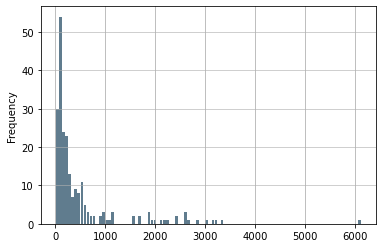

In [12]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = lin_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [13]:
temp = lin_post[(lin_post['like_count'] <= 500) & (lin_post['like_count'] > 100)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
54,2019-05-10,【公教年改 法官裁定停審 聲請釋憲】\r\n\r\n過去軍公教在年金改革議題，我時常站出來替他們聲援，政府絕對有它改革，沒做好的地方，這也是我們會努力爭取權益，重要的一環。,公教 年 改 法官 裁定 停審 聲請 釋憲 \r\r過去 軍 公教 在 年 金 改革 議題 我 時常站 出來 替 他們 聲援 政府 絕對 有 它 改革 沒 做好 的 地方 這也 是 我們 會 努力 爭取 權益 重要 的 一環 。,101
55,2019-10-03,【台灣廠商受惠轉單效應】\r\n\r\n今日於財委會上質詢央行總裁楊金龍，美中貿易衝突以及英國脫歐，在國際政經不穩定的情況下，台灣廠商將部分產能轉移回台灣，而越南和泰國也同樣受惠於所謂的「轉單效應」與台灣有互補，也有競爭，但目前看來，唯獨美國經濟較好。\r\n\r\n楊總裁說台灣的轉單效應看來就是今、明兩年，往後也得視美國經濟能否持續有好表現。\r\n\r\n#轉單效應 #楊金龍 #美中貿易衝突,台灣 廠商 受惠 轉單 效應 \r\r今日 於 財委會 上 質詢 央行 總裁 楊金龍 美中 貿易 衝突 以及 英國 脫歐 在 國際政經 不 穩定 的 情況 下 台灣 廠商將 部分 產能 轉移 回 台灣 而 越南 和 泰國 也 同樣 受惠 於 所謂 的 轉單 效應 與 台灣 有 互補 也 有 競爭 但 目前 看來 唯獨 美國 經濟 較 好 。 \r\r楊總裁 說 台灣 的 轉單 效應 看來 就是 今 明兩年 往 後 也 得 視美國 經濟 能否 持續 有 好表現 。 \r\r# 轉單 效應 # 楊金龍 # 美中 貿易 衝突,102
56,2019-07-10,【中和區開放Wemo租借 1元機車，8月開放永和區】\r\n\r\n亞洲最大智慧共享機車威摩科技WeMo Scooter宣布再拓展新北市營運版圖，7月15日正式開放中和區，補足板橋至中和的大眾運輸缺口，WeMo Scooter服務串連捷運藍線與橘線，大幅降低通勤時間，更有效率直達目的地，且往返台北市更方便。8月更預計開放永和區，完整落實大台北市共享交通藍圖。\r\n\r\n#Wemo,中和區 開放 租借 元 機車 月 開放 永和 區 \r\r亞洲 最大 智慧 共享 機車 威摩 科技 宣布 再 拓展 新北市 營運版圖 月 日 正式 開放 中和區 補足 板橋 至 中 和 的 大眾 運輸 缺口 服務 串連捷 運藍線 與 橘線 大幅 降低 通勤 時間 更 有效率 直達 目的地 且 往返 台北市 更 方便 。 月 更 預計 開放 永和 區 完整 落實 大 台北市 共享 交通 藍圖 。 \r\r#,103
57,2019-07-08,【國民黨總統初選，民調今日起跑！】\r\n\r\n中華民國史上第一次，\r\n國民黨以全民調方式產生總統候選人，\r\n7月8日至7月14日，今天起正式起跑！\r\n\r\n經與五家民調公司最後確定，\r\n每天的民調施測時間約自6點半開始，\r\n由於樣本數較多，最晚可能會到10點。\r\n為你所支持的候選人接聽神聖的一通電話吧！\r\n\r\n#國民黨總統初選\r\n#民調總算要起跑\r\n#大家一起顧電話,國民黨 總統 初選 民調 今日 起跑 \r\r中華民國史 上 第一次 \r國民黨 以 全民 調 方式 產生 總統候 選人 \r 月 日至 月 日 今天 起 正式 起跑 \r\r經與 五家 民調 公司 最後確定 \r每天 的 民調 施測 時間 約 自 點半 開始 \r由 於 樣本數 較 多 最 晚 可能 會到 點 。 \r為 你 所 支持 的 候選人接 聽 神聖 的 一通 電話 吧 \r\r# 國民黨 總統 初選 \r# 民調 總算要 起跑 \r# 大家 一起 顧電話,106
58,2019-09-18,【藍拚整合，積極安排會面】\r\n\r\n國民黨總統參選人韓國瑜競選辦公室發言人何庭歡表示，正透過韓國瑜與鴻海創辦人郭台銘的共同友人居間安排，希望盡速拜會郭台銘，當面請益。國民黨立委也表示，期待早日看到韓郭會。\r\n\r\n何庭歡說，韓國瑜希望盡速與郭台銘會面，請益中華民國未來，在政策研擬納入郭台銘的優秀政見。一旦兩人會面有具體安排，會對外公布。雖然郭台銘方面已婉拒拜會，但韓陣營仍將盡量努力。\r\n\r\n(內容摘自聯合新聞網)\r\n\r\n#郭台銘,藍 拚 整合 積極 安排 會面 \r\r國民黨 總統 參選人 韓國瑜 競選辦 公室 發言人 何庭歡 表示 正透過 韓國瑜 與鴻海 創辦 人 郭台銘 的 共同 友人 居間 安排 希望 盡速 拜會 郭台銘 當面 請益 。 國民黨 立委 也 表示 期待 早日 看到 韓郭會 。 \r\r何庭歡 說 韓國瑜 希望 盡速 與 郭台 銘會面 請益 中華民國 未來 在 政策 研擬 納入 郭台銘 的 優秀政見 。 一旦 兩人會面 有 具體 安排 會 對 外 公布 。 雖然 郭台銘 方面 已 婉拒 拜會 但 韓陣營 仍將 盡量 努力 。 \r\r內容 摘自 聯合 新聞網 \r\r# 郭台銘,108
...,...,...,...,...
163,2019-09-03,【一支穿雲箭，千軍萬馬新北見】\r\n\r\n邀請各位鄉親們帶著親朋好友們一起作伙來新北！9月8日(日)我們幸福水漾公園見！建議晚上6:00左右進場，較為推薦。\r\n\r\n時間：9/8(日)14:00-21:00 (18:00晚會開始)\r\n地點：新北市三重區 二重疏洪道 幸福水漾公園\r\n交通：機捷三重站1A出口旁、北捷三重站1號出口,一支 穿雲箭 千軍萬馬 新北見 \r\r邀請 各位 鄉親們 帶著 親朋 好友 們 一起 作伙 來 新北 月 日 日 我們 幸福 水漾 公園 見 建議 晚上 左右 進場 較 為 推薦 。 \r\r時間 / 日 - 晚會 開始 \r地點 新北市 三重 區 二重 疏洪道 幸福 水漾 公園 \r交通 機捷 三重 站 出口 旁 北捷 三重 站 號 出口,488
164,2019-11-18,【韓國瑜永和造勢擠滿四號公園】\r\n\r\n國民黨總統參選人韓國瑜今(17日)晚間回家鄉新北市中和區造勢，地點就選在雙和地區最大的公園「中和四號公園」，占地面積11公頃，比前一場安邦公園要大上許多。而網友赴現場實拍最新的空拍畫面也曝光了！人潮幾乎把整個場地都擠滿，現場民眾看完直呼，被嚇到了。\r\n\r\n(內容摘自中時電子報)\r\n\r\n#韓國瑜 #林德福 #四號公園,韓國瑜 永和 造勢 擠 滿四號 公園 \r\r國民黨 總統 參選人 韓國瑜 今 日 晚間 回 家鄉 新北市 中和區 造勢 地點 就 選 在 雙和地區 最大 的 公園 中 和 四號 公園 占 地面 積 公頃 比前 一場 安邦 公園 要 大上 許多 。 而 網友 赴 現場 實拍 最新 的 空 拍 畫面 也 曝光 了 人潮 幾乎 把 整個場 地 都 擠 滿 現場 民眾 看 完 直呼 被 嚇到 了 。 \r\r內容 摘自 中時 電子 報 \r\r# 韓國瑜 # 林 德福 # 四號 公園,489
165,2019-08-09,【艱困敬佩】\r\n\r\n洪前主席，前往國民黨沒有提名的艱困選區，國民黨員願意主動參戰勇於承擔，都是非常值得鼓勵與肯定的精神，國民黨內需要更多有志之士，誠心祝福也獻上最高的敬意。,艱困 敬佩 \r\r洪前 主席 前往 國民黨 沒有 提名 的 艱困 選區 國民黨 員 願意 主動 參戰勇 於 承擔 都 是 非常 值得 鼓勵 與 肯定 的 精神 國民黨 內 需要 更 多 有志之士 誠心 祝福 也 獻 上 最高 的 敬意 。,489
166,2019-11-17,【雙和雙贏．幸福有瑜】\r\n\r\n今日晚上6:30，我們四號公園來相見。,雙和雙贏 ． 幸福 有瑜 \r\r今日 晚上 我們 四號 公園 來 相見 。,492


In [14]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [15]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [16]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一乾二,一事,一些,一人,一份,一位,一信,一個,一兆多,...,點半,點名,點燈節,黨內,黨員,黨團,黨派,黨部,鼓勵,龐大
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189716,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [17]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['三重', '表示', '韓國瑜', '希望', '新北市', '普渡', '福和橋', '郭台銘', '中正橋', '永和']
TOP 10 WORDS PER TOPIC #1
['政治', '今日', '韓國瑜', '摘自', '政府', '立委', '新北市', '司法', '台灣', '國民黨']
TOP 10 WORDS PER TOPIC #2
['國家', '這些', '記者', '政府', '大法官', '善款', '台灣', '人民', '國民黨', '今日']
TOP 10 WORDS PER TOPIC #3
['民眾', '委員', '酒駕', '國民黨', '法案', '今日', '過去', '政府', '公教', '民進黨']
TOP 10 WORDS PER TOPIC #4
['河西', '中山路', '路段', '開放', '傳統', '媒體', '新聞', '戰機', '民進黨', '永和']
TOP 10 WORDS PER TOPIC #5
['今日', '母親節', '立委', '投票', '快樂', '德福', '總統', '永和', '鄉親們', '大家']
TOP 10 WORDS PER TOPIC #6
['今日', '立委', '出席', '明文', '永和', '總統', '德福', '委員', '大家', '國民黨']
TOP 10 WORDS PER TOPIC #7
['公園', '希望', '烤肉', '獎助', '學金', '民進黨', '出發', '國民黨', '新北', '韓國瑜']


In [18]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['出席', '德福', '國民黨', '韓國瑜', '永和', '摘自', '內容', '今日', '新北', '立委']
TOP 10 WORDS PER TOPIC #1
['路段', '中山路', '河西', '民進黨', '一起', '明文', '永和', '烤肉', '政府', '政治']
TOP 10 WORDS PER TOPIC #2
['學金', '獎助', '鄉親們', '立法院', '今日', '委員', '公園', '國民黨', '大家', '永和']
TOP 10 WORDS PER TOPIC #3
['中華民國', '民眾', '中正橋', '蔡英文', '韓國瑜', '新聞', '國民黨', '民進黨', '總統', '台灣']
TOP 10 WORDS PER TOPIC #4
['政府', '中心', '教育', '人民', '我們', '司法', '永和', '國民黨', '今日', '民進黨']
TOP 10 WORDS PER TOPIC #5
['這些', '違規', '初選', '德福', '今日', '問題', '斷交', '善款', '台灣', '國民黨']
TOP 10 WORDS PER TOPIC #6
['大家', '公教', '國家', '韓國瑜', '總統', '今日', '民進黨', '戰機', '國民黨', '政府']
TOP 10 WORDS PER TOPIC #7
['中華民國', '國民黨', '總統', '郭台銘', '新北', '保福宮', '立委', '韓國瑜', '投票', '李佳芬']


In [19]:
#政見做斷詞

politics_lin = politics[politics.姓名 == "林 德 福"].政見.to_string()
politics_lin = re.sub(re_punctuation, "", politics_lin)
politics_lin = re.sub(r'[0-9]','',politics_lin)
politics_lin = re.sub(r'[a-zA-Z]','',politics_lin)
politics_lin = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lin)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lin, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '與', '朱立倫', '共同', '推動', '活絡', '經濟', '方案', '，', '讓', '台灣', '成為', '自由', '經濟島', '：', '吸引', '全球', '投資', '、', '參與', '全球', '競爭', '設立', '自由', '經濟示', '範區', '：', '鬆', '綁', '法', '規', '、', '改革', '制度', '、', '產業', '創新', '對', '內', '經濟', '更開', ' ', '放', '、', '更', '有效', '、', '有區域', '特色', '對外', '加入', '、', '、', '推動', '兩岸', '協議', '，', '加速', '推動', '與', '全球', '洽簽', '經濟', '合作', '協議', '，', '擴大', '國際', '經貿', '空間', ' ', '推動', '加薪', '四法', '：', '公司法', '、', '工廠', '法', '、', '勞動', '基準法', '和', '中小', '企業', '發展', '條例', '修正案', '，', '讓', '經濟', '成果', '由', '全民', '共享', ' ', '廢除', '證所稅', '，', '讓', '股市', '回歸', '正常', '機制', '及', '基本面', ' ', '推動', '長照', '服務', '法', '、', '長照', '保險法', '，', '面對', '高齡', '及', '超高齡社會', '的', '快速', '來臨', '，', '現階段', '重點', '在', '提升', '服務', '的', '量', '與', '質', '，', '達到', '人力', '充足', '、', '選擇', '多元', '，', '以銜', '接', '長照', '保險', '開辦', '，', '督促', '政府', '完', ' ', '備', '長照', '制度', '，', '營造', '在', '地安老', '的', '友善', '環境', ' ', '打造', '雙和十項', '建設', ' ', '一', '．', ' ', '積極爭', '取原', '國防部', '帳務',

In [20]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['路口', '進行', '四法', '休閒', '基本面', '保險', '捷運', '自由', '停車場', '設置']
TOP 10 WORDS PER TOPIC #1
['再造', '秀山', '經中', '問題', '更開', '高齡', '國小', '全球', '長照', '成功']
TOP 10 WORDS PER TOPIC #2
['動大雙', '規劃', '積極爭', '環狀線', '山地', '發展', '制度', '服務', '永和', '經濟']
TOP 10 WORDS PER TOPIC #3
['企業', '興建景觀', '督促', '至公館', '帳務', '中和秀', '基準法', '成果', '首座', '推動']
TOP 10 WORDS PER TOPIC #4
['機制', '多元', '正常', '回歸', '加入', '完工', '綠寶石', '及興建', '合作', '爭取']
TOP 10 WORDS PER TOPIC #5
['成為', '決標', '防洪', '方案', '自行', '連接', '園站', '打造', '協議', '積極']
TOP 10 WORDS PER TOPIC #6
['加薪', '投資', '創新', '重新', '快速', '超高齡社會', '增設', '預定', '地下', '中心']
TOP 10 WORDS PER TOPIC #7
['經濟示', '地安老', '國防部', '現階段', '高灘', '空間', '植物', '興建', '公園', '動工']


In [21]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_lin, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)

In [22]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['合作', '地區', '競爭', '自行', '人力', '規劃', '中心', '永和', '推動', '爭取']
TOP 10 WORDS PER TOPIC #1
['修正案', '回歸', '台灣', '四法', '車道', '中和秀', '充足', '快速', '休閒', '成功']
TOP 10 WORDS PER TOPIC #2
['空間', '活絡', '以銜', '福和橋', '重新', '更開', '預定', '協議', '捷運', '興建']
TOP 10 WORDS PER TOPIC #3
['營造', '股市', '方案', '親水公園', '社會', '問題', '萬華馬場', '自由', '動工', '長照']
TOP 10 WORDS PER TOPIC #4
['發展', '電梯式', '側環快', '停車', '延伸', '高灘', '消防', '基地', '同年', '公園']
TOP 10 WORDS PER TOPIC #5
['帳務', '解決', '重點', '經濟島', '成果', '改建', '國小', '服務', '制度', '經濟']
TOP 10 WORDS PER TOPIC #6
['廢除', '朱立倫', '共享', '建設', '整頓', '勞動', '週邊', '停車場', '首座', '積極']
TOP 10 WORDS PER TOPIC #7
['市民', '河西', '正常', '網溪', '運動', '將雙和區', '休閒步', '設置', '地下', '全球']


In [23]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

合作, 地區, 競爭, 自行, 人力, 規劃, 中心, 永和, 推動, 爭取, 修正案, 回歸, 台灣, 四法, 車道, 中和秀, 充足, 快速, 休閒, 成功, 空間, 活絡, 以銜, 福和橋, 重新, 更開, 預定, 協議, 捷運, 興建, 營造, 股市, 方案, 親水公園, 社會, 問題, 萬華馬場, 自由, 動工, 長照, 發展, 電梯式, 側環快, 停車, 延伸, 高灘, 消防, 基地, 同年, 公園, 帳務, 解決, 重點, 經濟島, 成果, 改建, 國小, 服務, 制度, 經濟, 廢除, 朱立倫, 共享, 建設, 整頓, 勞動, 週邊, 停車場, 首座, 積極, 市民, 河西, 正常, 網溪, 運動, 將雙和區, 休閒步, 設置, 地下, 全球, 

In [24]:
#比較政見
promise=politics[politics.姓名 == "林 德 福"].政見.to_string()
re.split('。 |：', promise) 

['18    與朱立倫共同推動活絡經濟方案，讓台灣成為自由經濟島',
 '吸引全球投資、參與全球競爭。設立自由經濟示範區',
 '鬆綁法規、改革制度、產業創新。對內經濟更開 放、更有效、有區域特色。對外加入TPP、RCEP、推動兩岸協議，加速推動與全球洽簽經濟合作協議，擴大國際經貿空間',
 '推動加薪四法',
 '公司法、工廠法、勞動基準法和中小企業發展條例修正案，讓經濟成果由全民共享',
 '廢除證所稅，讓股市回歸正常機制及基本面',
 '推動長照服務法、長照保險法，面對高齡及超高齡社會的快速來臨，現階段重點在提升服務的量與質，達到人力充足、選擇多元，以銜接長照保險開辦，督促政府完 備長照制度，營造在地安老的友善環境',
 '打造雙和十項建設 一． 積極爭取原國防部帳務中心1400坪基地，興建社會福利中心及青年住宅',
 '二． 積極爭取規劃捷運環狀線延伸至公館經中永和成功路',
 '三． 協助推動大雙和水岸再造計畫，將雙和區100公頃高灘地重新整頓、進行綠 化、拓寬自行車道、增設河岸親水公園',
 '四． 積極爭取中和秀山地區設立秀山消防分隊，確保該地區市民生命財產安全',
 '五． 積極爭取設置從永和綠寶石公園連接萬華馬場町公園之跨河景觀橋',
 '六． 成功爭取興建永和運動休閒中心及地下停車場，預定105年7月完工',
 '七． 成功爭取首座側環快於中正橋至福和橋防洪牆上興建景觀休閒步道',
 '八． 成功爭取永和首座電梯式人行陸橋，設置於環河西路與保安路口',
 '九． 成功爭取網溪國小改建及興建地下停車場，解決週邊停車問題',
 '十． 成功爭取捷運萬大線於103年10月中和站動工，同年11月植物園站動工，永 平國小站於104年11月決標，預定105年1月動工。']

In [25]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'合作': 1,
         '地區': 1,
         '競爭': 1,
         '自行': 1,
         '人力': 1,
         '規劃': 1,
         '中心': 1,
         '永和': 5,
         '推動': 1,
         '爭取': 1,
         '修正案': 1,
         '回歸': 1,
         '台灣': 3,
         '四法': 1,
         '車道': 1,
         '中和秀': 1,
         '充足': 1,
         '快速': 1,
         '休閒': 1,
         '成功': 1,
         '空間': 1,
         '活絡': 1,
         '以銜': 1,
         '福和橋': 2,
         '重新': 1,
         '更開': 1,
         '預定': 1,
         '協議': 1,
         '捷運': 1,
         '興建': 1,
         '營造': 1,
         '股市': 1,
         '方案': 1,
         '親水公園': 1,
         '社會': 1,
         '問題': 1,
         '萬華馬場': 1,
         '自由': 1,
         '動工': 1,
         '長照': 1,
         '發展': 1,
         '電梯式': 1,
         '側環快': 1,
         '停車': 1,
         '延伸': 1,
         '高灘': 1,
         '消防': 1,
         '基地': 1,
         '同年': 1,
         '公園': 2,
         '帳務': 1,
         '解決': 1,
         '重點': 1,
         '經濟島': 1,
         '成果': 1,


我們可以用 臉書貼文和政見 Topic word 的交集 會推測 林德福的幾個重點

經濟相關投資與地方建設
法規-證所稅、保險法、環境、勞動、兩岸（協議）、制度
捷運-興建、萬大線、捷運、動工、環狀線\n
交通-興建、中正、首座、停車、拓寬、電梯式、停車場
建設-親水公園、雙和區、高灘、興建景觀、河岸、設置

興建 相關tf idf 高 (以下討論臉書貼文)

In [26]:
top_10_message = tfidf_view.sort_values(by = ['建設'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['建設'], ascending = False).head(10)

,一一,一乾二,一事,一些,一人,一份,一位,一信,一個,一兆多,...,點半,點名,點燈節,黨內,黨員,黨團,黨派,黨部,鼓勵,龐大
52,0.111783,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
85,0.000000,0.0,0.0,0.0,0.0,0.0,0.086048,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
72,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
83,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
82,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
81,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.082553,0.0,0.0,0.0,0.0
80,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
79,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
78,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.073302,0.0,0.0,0.0,0.0


In [27]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[52,]).sort_values(by = 52, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,52
侯友宜,0.318181
立委,0.304919
財源,0.238322
新北,0.163110
基礎,0.129560
...,...
審議,0.000000
寫給,0.000000
寶貴,0.000000
寸步,0.000000


In [28]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

94        元月
95       攝影師
96        法案
97       朱立倫
98        造勢
99        民歌
100      李永萍
101    千軍萬馬來
102       酒駕
103       哀悼
104       今夜
105      李乾龍
106       升旗
107       跨年
108      保福宮
109       三重
110       公園
111       艱困
112       有瑜
113      保福宮
Name: term, dtype: object

In [29]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['條例',
 '開辦',
 '河西',
 '水岸',
 '台灣',
 '打造',
 '企業',
 '環境',
 '高灘',
 '帳務',
 '秀山',
 '萬華馬場',
 '電梯式',
 '進行',
 '機制',
 '長照',
 '改革',
 '高齡',
 '地區',
 '合作',
 '現階段',
 '首座',
 '有區域',
 '建設',
 '取原',
 '停車',
 '環狀線',
 '社會',
 '設立',
 '跨河',
 '萬大線',
 '基本面',
 '解決',
 '助推',
 '植物',
 '國際',
 '停車場',
 '河岸',
 '創新',
 '車道',
 '休閒步',
 '經濟示',
 '區設立',
 '選擇',
 '參與',
 '洽簽',
 '證所稅',
 '重新',
 '國小',
 '充足',
 '消防',
 '國防部',
 '規劃',
 '自行',
 '再造',
 '政府',
 '綠寶石',
 '面對',
 '勞動',
 '增設',
 '分隊',
 '督促',
 '山地',
 '經中',
 '經濟',
 '基地',
 '網溪',
 '制度',
 '中小',
 '產業',
 '友善',
 '生命財產安全',
 '回歸',
 '路口',
 '人行陸橋',
 '園站',
 '運動',
 '方案',
 '積極爭',
 '範區',
 '爭取',
 '廢除',
 '成功',
 '永和',
 '協議',
 '提升',
 '地下',
 '對外',
 '全球',
 '中心',
 '中和秀',
 '兩岸',
 '共同',
 '發展',
 '投資',
 '服務',
 '中正橋',
 '朱立倫',
 '積極',
 '以銜',
 '空間',
 '四法',
 '加薪',
 '來臨',
 '更開',
 '基準法',
 '延伸',
 '及興建',
 '至公館',
 '股市',
 '完工',
 '防洪',
 '保安',
 '動大雙',
 '拓寬',
 '公園',
 '保險',
 '確保該',
 '正常',
 '親水公園',
 '人力',
 '整頓',
 '快速',
 '活絡',
 '福和橋',
 '將雙和區',
 '興建',
 '問題',
 '營造',
 '競爭',
 '吸引',
 '全民',
 '休閒',
 '工廠',
 '景觀橋',
 '青年住宅',
 '預定',
 '設

In [30]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,中和秀,中小,中心,中正橋,人力,人行陸橋,以銜,企業,休閒,休閒步,...,開辦,防洪,雙和十項,電梯式,青年住宅,面對,預定,首座,高灘,高齡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[3,]

new_date                                                                                                                                                                                                                                                2019-07-08
message                                            【國民黨總統初選，民調今日起跑！】\r\n\r\n中華民國史上第一次，\r\n國民黨以全民調方式產生總統候選人，\r\n7月8日至7月14日，今天起正式起跑！\r\n\r\n經與五家民調公司最後確定，\r\n每天的民調施測時間約自6點半開始，\r\n由於樣本數較多，最晚可能會到10點。\r\n為你所支持的候選人接聽神聖的一通電話吧！\r\n\r\n#國民黨總統初選\r\n#民調總算要起跑\r\n#大家一起顧電話
jieba_results     國民黨 總統 初選 民調 今日 起跑 \r\r中華民國史 上 第一次 \r國民黨 以 全民 調 方式 產生 總統候 選人 \r 月  日至  月  日 今天 起 正式 起跑 \r\r經與 五家 民調 公司 最後確定 \r每天 的 民調 施測 時間 約 自  點半 開始 \r由 於 樣本數 較 多 最 晚 可能 會到  點 。 \r為 你 所 支持 的 候選人接 聽 神聖 的 一通 電話 吧 \r\r# 國民黨 總統 初選 \r# 民調 總算要 起跑 \r# 大家 一起 顧電話
like_count                                                                                                                                                                                                                     

In [32]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,條例,開辦,河西,水岸,台灣,打造,企業,環境,高灘,帳務,...,保險法,自由,經濟島,改建,超高齡社會,公頃,多元,加入,成為,擴大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)
match_document_politics

<ipython-input-33-1ded51f200cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


,條例,開辦,河西,水岸,台灣,打造,企業,環境,高灘,帳務,...,自由,經濟島,改建,超高齡社會,公頃,多元,加入,成為,擴大,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 114篇中會有8篇有包含政策相關的

1.2658959537572254

In [35]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度1%

0.011104350471554609